<a href="https://colab.research.google.com/github/ajipurnama25/Klasifikasi-Cataract-Eyes/blob/main/Projrct_data_katarak_perfect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TugasAkhir/data/katarak"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/TugasAkhir/data/katarak

/content/drive/MyDrive/TugasAkhir/data/katarak


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ajipurnama","key":"93753f4bcd91eae11a4343f9367bc50b"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json q qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
chmod: cannot access 'q': No such file or directory
chmod: cannot access 'qq': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

ocular-disease-recognition-odir5k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ocular-disease-recognition-odir5k.zip

# Dataset description

In [ ]:
import pandas as pd

In [ ]:
#preprocessing for see data frame
df_data = pd.read_csv("/content/drive/MyDrive/TugasAkhir/data/katarak/full_df.csv")
df_data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
#search for c[catarac]
df_data[df_data.C==1].head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
20,24,75,Female,24_left.jpg,24_right.jpg,normal fundus,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",24_right.jpg
65,81,66,Male,81_left.jpg,81_right.jpg,moderate non proliferative retinopathy，cataract,moderate non proliferative retinopathy，cataract,0,1,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",81_right.jpg
86,103,55,Female,103_left.jpg,103_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",103_right.jpg
93,112,57,Female,112_left.jpg,112_right.jpg,normal fundus,cataract,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",112_right.jpg


In [ ]:
df_data[df_data == 1].sum(axis=0)

ID                              2.0
Patient Age                    28.0
Patient Sex                       0
Left-Fundus                       0
Right-Fundus                      0
Left-Diagnostic Keywords          0
Right-Diagnostic Keywords         0
N                            2101.0
D                            2123.0
G                             397.0
C                             402.0
A                             319.0
H                             203.0
M                             306.0
O                            1588.0
filepath                          0
labels                            0
target                            0
filename                          0
dtype: object

In [ ]:
#kelompokkan data
df_data2 = df_data.iloc[:, 1:7]
df_data2.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


# Files Cataract

In [ ]:
data_cataract_left = df_data2[df_data2['Left-Diagnostic Keywords'].str.match('cataract')]
data_cataract_left.head(5)

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
86,55,Female,103_left.jpg,103_right.jpg,cataract,normal fundus
100,59,Male,119_left.jpg,119_right.jpg,cataract,drusen
218,60,Female,254_left.jpg,254_right.jpg,cataract,macular epiretinal membrane
256,69,Female,294_left.jpg,294_right.jpg,cataract,normal fundus


In [ ]:
#jumlah data cataract in left diagnostic
len(data_cataract_left)

294

In [ ]:
data_cataract_right = df_data2[df_data2['Right-Diagnostic Keywords'].str.match('cataract')]
data_cataract_right.head(5)

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
20,75,Female,24_left.jpg,24_right.jpg,normal fundus,cataract
93,57,Female,112_left.jpg,112_right.jpg,normal fundus,cataract
160,55,Female,188_left.jpg,188_right.jpg,laser spot，severe proliferative diabetic retin...,cataract
186,36,Female,218_left.jpg,218_right.jpg,refractive media opacity,cataract
309,65,Male,354_left.jpg,354_right.jpg,normal fundus,cataract


In [ ]:
#jumlah data cataract in righ diagnostic
print(len(data_cataract_right))

278


## Combine cataract name

In [ ]:
df_cataract = data_cataract_left['Left-Fundus'].append(data_cataract_right['Right-Fundus'], ignore_index = True)
df_cataract

0          0_left.jpg
1        103_left.jpg
2        119_left.jpg
3        254_left.jpg
4        294_left.jpg
            ...      
567    2243_right.jpg
568    2246_right.jpg
569    2247_right.jpg
570    2248_right.jpg
571    2282_right.jpg
Length: 572, dtype: object

In [ ]:
print(len(df_cataract))

572


## View Cataract Image

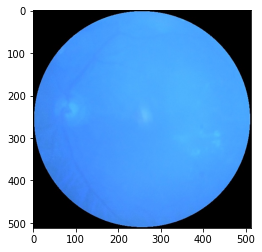

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
img_dir = "/content/drive/MyDrive/TugasAkhir/data/katarak/preprocessed_images"
img_cataract1 = df_cataract[254]
image1 = cv2.imread(os.path.join(img_dir, img_cataract1))
plt.imshow(image1)

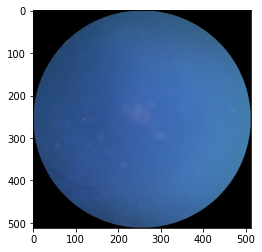

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
img_dir = "/content/drive/MyDrive/TugasAkhir/data/katarak/preprocessed_images"
img_cataract2 = df_cataract[294]
image2 = cv2.imread(os.path.join(img_dir, img_cataract2))
plt.imshow(image2)

In [ ]:
print("Ukuran image 1 = ",image1.shape)
print("Ukuran image 2 = ",image2.shape)
print("Nama file img 1 = ",img_cataract1)
print("Nama file img 2 = ",img_cataract2)

Ukuran image 1 =  (512, 512, 3)
Ukuran image 2 =  (512, 512, 3)
Nama file img 1 =  2192_left.jpg
Nama file img 2 =  24_right.jpg


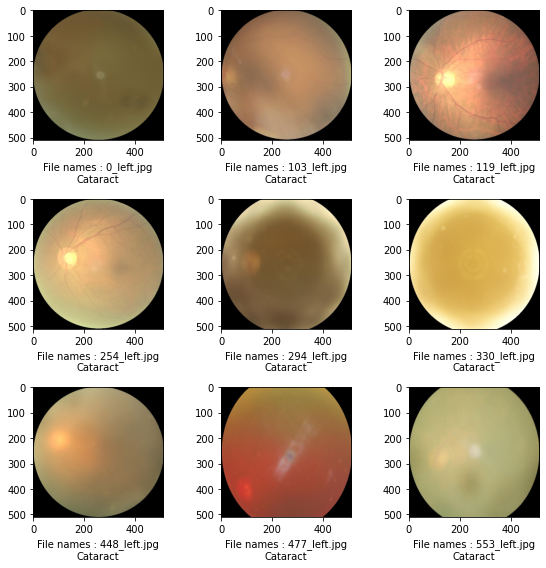

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    img = df_cataract[i]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to rgb

    #index
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)

    #view
    plt.xlabel('File names : {}\n''Cataract'.format(df_cataract[i]))

plt.tight_layout()

# Files Normal

In [ ]:
#kelompokkan data
df_data2 = df_data.iloc[:, 1:7]
df_data2.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [ ]:
data_normal_right = df_data2[df_data2['Right-Diagnostic Keywords'].str.match('normal')]
data_normal_right.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [ ]:
data_normal_left = df_data2[df_data2['Left-Diagnostic Keywords'].str.match('normal')]
data_normal_left.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [ ]:
print('Jumlah data diagnostic left normal : ', len(data_normal_left))
print('Jumlah data diagnostic right normal : ', len(data_normal_right))

Jumlah data diagnostic left normal :  2855
Jumlah data diagnostic right normal :  2735


## Combine Normal

In [ ]:
df_normal = data_normal_left['Left-Fundus'].append(data_normal_right['Right-Fundus'], ignore_index = True)
df_normal

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5585    4642_right.jpg
5586    4644_right.jpg
5587    4660_right.jpg
5588    4671_right.jpg
5589    4689_right.jpg
Length: 5590, dtype: object

In [ ]:
print(len(df_normal))

5590


## View Image Normal

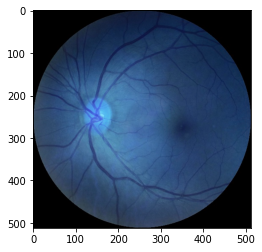

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
img_dir = "/content/drive/MyDrive/TugasAkhir/data/katarak/preprocessed_images"
img_normal1 = df_normal[15]
image1 = cv2.imread(os.path.join(img_dir, img_normal1))
plt.imshow(image1)

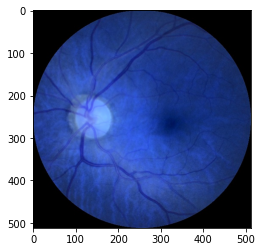

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
img_dir = "/content/drive/MyDrive/TugasAkhir/data/katarak/preprocessed_images"
img_normal2 = df_normal[1]
image2 = cv2.imread(os.path.join(img_dir, img_normal2))
plt.imshow(image2)

In [ ]:
print("Ukuran image 1 = ",image1.shape)
print("Ukuran image 2 = ",image2.shape)
print("Nama file img 1 = ",img_normal1)
print("Nama file img 2 = ",img_normal2)

Ukuran image 1 =  (512, 512, 3)
Ukuran image 2 =  (512, 512, 3)
Nama file img 1 =  60_left.jpg
Nama file img 2 =  8_left.jpg


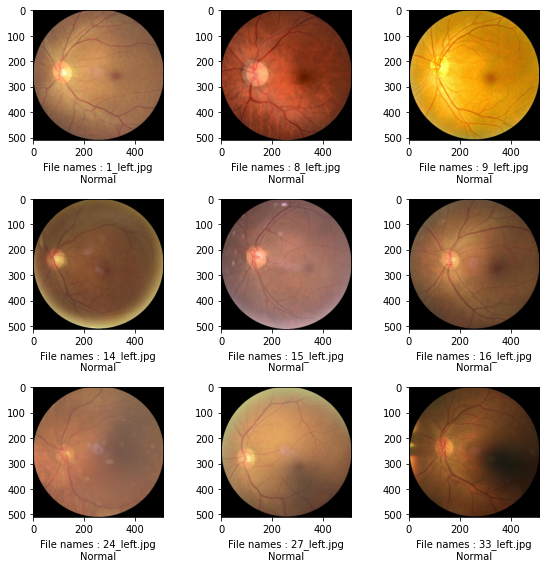

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    img = df_normal[i]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to rgb

    #index
    plt.subplot(3,3, i+1)
    plt.imshow(image_rgb)

    #view
    plt.xlabel('File names : {}\n''Normal'.format(df_normal[i]))

plt.tight_layout()

## Undersampling Normal Data

Jumlah seluru data normal ada 5590, sedangkan data katarak ada 572. Maka diperlukan undersampling untuk data normal(572) : data katarak(572)

In [ ]:
df_normal_sampling = df_normal.sample(n = 572)
df_normal_sampling
#Pada hasil dibawah, index sebelah kiri belum rapi. Maka perlu dirapikan dlu

3637    2868_right.jpg
3963    3221_right.jpg
3912    3168_right.jpg
2451     3144_left.jpg
4962    2845_right.jpg
             ...      
3147    2334_right.jpg
1883     2523_left.jpg
4809    2671_right.jpg
759      2886_left.jpg
4573    2404_right.jpg
Length: 572, dtype: object

In [ ]:
df_normal_sampling = df_normal_sampling.reset_index(drop = True)
df_normal_sampling

0      2868_right.jpg
1      3221_right.jpg
2      3168_right.jpg
3       3144_left.jpg
4      2845_right.jpg
            ...      
567    2334_right.jpg
568     2523_left.jpg
569    2671_right.jpg
570     2886_left.jpg
571    2404_right.jpg
Length: 572, dtype: object

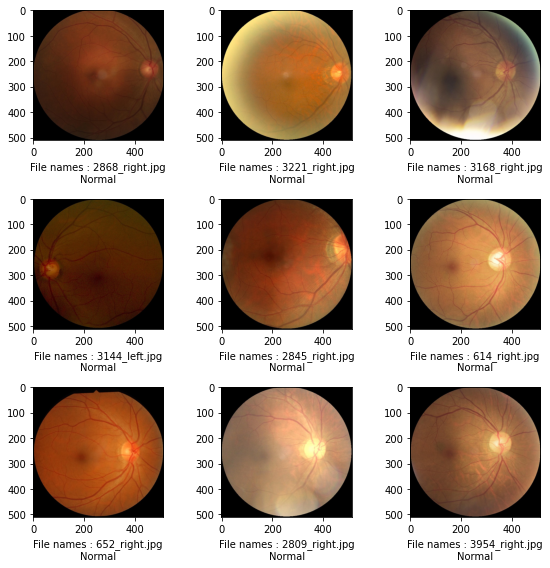

In [ ]:
#View image with undersampling Normal
plt.figure(figsize = (8,8))
for i in range(9):
    img = df_normal_sampling[i]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to rgb

    #index
    plt.subplot(3,3, i+1)
    plt.imshow(image_rgb)

    #view
    plt.xlabel('File names : {}\n''Normal'.format(df_normal_sampling[i]))

plt.tight_layout()

# Combine Normal and Cataract with Index

In [ ]:
df_cataract = pd.DataFrame(df_cataract, columns = ['filename'])
df_cataract['label'] = 'cataract'
df_cataract.head()

,filename,label
0,0_left.jpg,cataract
1,103_left.jpg,cataract
2,119_left.jpg,cataract
3,254_left.jpg,cataract
4,294_left.jpg,cataract


In [ ]:
print('Jumlah Data : ', len(df_cataract))

Jumlah Data :  572


In [ ]:
df_normal_sampling = pd.DataFrame(df_normal_sampling, columns = ['filename'])
df_normal_sampling['label'] = 'normal'
df_normal = df_normal_sampling
df_normal.head()

,filename,label
0,2868_right.jpg,normal
1,3221_right.jpg,normal
2,3168_right.jpg,normal
3,3144_left.jpg,normal
4,2845_right.jpg,normal


In [ ]:
print('Jumlah Data : ', len(df_normal))

Jumlah Data :  572


In [ ]:
df_combined = df_cataract.append(df_normal, ignore_index = True)
df_combined

,filename,label
0,0_left.jpg,cataract
1,103_left.jpg,cataract
2,119_left.jpg,cataract
3,254_left.jpg,cataract
4,294_left.jpg,cataract
...,...,...
1139,2334_right.jpg,normal
1140,2523_left.jpg,normal
1141,2671_right.jpg,normal
1142,2886_left.jpg,normal


In [ ]:
df_combined_random = df_combined.sample(frac = 1).reset_index(drop = True)
df_combined_random

,filename,label
0,2808_right.jpg,normal
1,2179_left.jpg,cataract
2,112_right.jpg,cataract
3,2232_right.jpg,cataract
4,2659_right.jpg,normal
...,...,...
1139,2244_right.jpg,cataract
1140,2467_right.jpg,normal
1141,2183_right.jpg,cataract
1142,2218_right.jpg,cataract


In [ ]:
df_cataract['label'] = df_cataract['label'].astype(str)

## Split Folder

In [ ]:
#Make Split File data frame 80% Train, 10% Validation, 10% Test

df_train = df_combined_random.sample(frac=0.8,random_state=42)
df_train.reset_index(drop=True)

df_validation = df_combined_random.sample(frac=0.1,random_state=42)
df_validation.reset_index(drop=True)


df_test = df_combined_random.sample(frac=0.1,random_state=42)
df_test.reset_index(drop=True)

print(len(df_combined_random))
print(len(df_train))
print(len(df_validation))
print(len(df_test))

1144
915
114
114


# **Hayper Parameter Tuning**

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
height = 100
width = 100
batch_size = 32

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./logs/

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([512, 1024]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['rmsprop', 'adamax', 'adam']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = df_train,
        directory = img_dir,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=32,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(height, width))

validation_generator = validation_datagen.flow_from_dataframe(
        dataframe = df_validation,
        directory = img_dir,
        x_col="filename",
        y_col="label",
        #subset="training",
        batch_size=32,
        seed=42,
        shuffle=False,
        class_mode="categorical",
        target_size=(height, width))

test_generator = test_datagen.flow_from_dataframe(
        dataframe = df_test,
        directory = img_dir,
        x_col="filename",
        y_col="label",
        #subset="training",
        batch_size=32,
        #seed=42,
        shuffle=False,
        class_mode="categorical",
        target_size=(height, width))

Found 915 validated image filenames belonging to 2 classes.
Found 114 validated image filenames belonging to 2 classes.
Found 114 validated image filenames belonging to 2 classes.


In [ ]:
# Tulis Kode Anda Disini
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, Normalization, Dropout, BatchNormalization,AveragePooling2D,MaxPooling2D, Input
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
base_convnet = InceptionV3(input_shape = (100,100,3),
                           include_top = False,
                           weights = "imagenet",
                           classifier_activation='softmax',
                           pooling = max)

base_convnet.trainable = False
last_layer = base_convnet.get_layer("mixed7")
print('Last Layer output shape :', last_layer.output_shape)
last_output = last_layer.output

87910968/87910968 [==============================] - 5s 0us/step
Last Layer output shape : (None, 4, 4, 768)


In [ ]:
effnet = EfficientNetB7(weights='imagenet',include_top=False,input_shape=(100,100,3))

258076736/258076736 [==============================] - 12s 0us/step


In [ ]:
# def train_test_model(hparams):
#   x = keras.layers.GlobalAveragePooling2D()(effnet.output)

#   x = keras.layers.Dense(128, activation='elu')(x)
#   x = keras.layers.Dropout(0.5)(x)
#   x = keras.layers.BatchNormalization()(x)

#   x = keras.layers.Dense(256, activation='elu')(x)
#   x = keras.layers.Dropout(0.5)(x)
#   x = keras.layers.BatchNormalization()(x)

# #FCL
# #x = keras.layers.Flatten()
#   x = keras.layers.Dense(512, activation='elu')(x)
#   x = keras.layers.BatchNormalization()(x)
#   x = keras.layers.Dropout(0.5)(x)
#   predictions = keras.layers.Dense(2, activation='softmax')(x)


# # define and compile model
# #inputs=effnet.input, outputs = model6
#   model = keras.Model(inputs=effnet.inputs, outputs=predictions)
#   for layer in base_convnet.layers:
#     layer.trainable = False

# print(model.summary())

In [ ]:
def train_test_model(hparams):
  x = keras.layers.GlobalAveragePooling2D()(effnet.output),

  x = keras.layers.Dense(128, activation='elu')(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.BatchNormalization()(x)

  x = keras.layers.Dense(256, activation='elu')(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.BatchNormalization()(x)

  x = keras.layers.Dense(512, activation='elu')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Dropout(0.5)(x)
  x = keras.layers.Dense(2, activation='softmax')(x)


  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['accuracy'],
  )

  train_datagen.fit(train_generator)
  history = model.fit_generator(train_generator, batch_size=batch_size,
                              epochs = 5, validation_data = validation_generator)
                              #steps_per_epoch = X_train.shape[0] // batch_size)
  _, accuracy = model.evaluate(validation_generator)
  return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1


# Image Data Generator for Data Frame

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
df_train['label'] = df_train['label'].astype(str)
df_validation['label'] = df_validation['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)

In [ ]:
height = 128
width = 128
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = df_train,
        directory = img_dir,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=32,
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=(height, width))

validation_generator = validation_datagen.flow_from_dataframe(
        dataframe = df_validation,
        directory = img_dir,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=32,
        seed=42,
        shuffle=False,
        class_mode="categorical",
        target_size=(height, width))

test_generator = test_datagen.flow_from_dataframe(
        dataframe = df_test,
        directory = img_dir,
        x_col="filename",
        y_col="label",
        subset="training",
        batch_size=32,
        seed=42,
        shuffle=False,
        class_mode="categorical",
        target_size=(height, width))

Found 915 validated image filenames belonging to 2 classes.
Found 114 validated image filenames belonging to 2 classes.
Found 114 validated image filenames belonging to 2 classes.


In [ ]:
train_image_data, train_labels = train_generator.next()
validation_image_data, validation_labels = validation_generator.next()
test_image_data, test_labels = test_generator.next()

print('Hasil Train Shape :',train_image_data.shape)
print('Hasil Valid Shape :',validation_image_data.shape)
print('Hasil Test Shape :', test_image_data.shape)

Hasil Train Shape : (32, 128, 128, 3)
Hasil Valid Shape : (32, 128, 128, 3)
Hasil Test Shape : (32, 128, 128, 3)


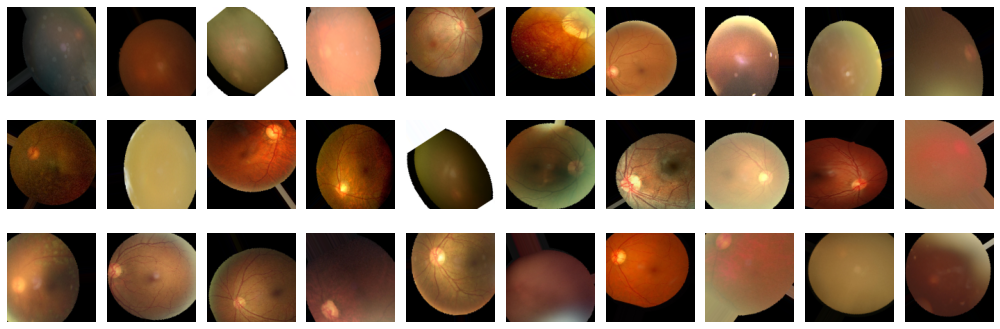

In [ ]:
#tampilkan Data Generator
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
for i in range(30):
    plt.subplot(5, 10, i + 1)

    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break

plt.tight_layout()
plt.show()

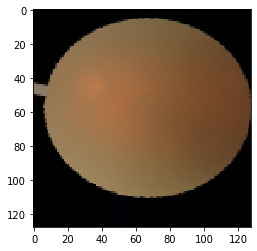

In [ ]:
plt.imshow(train_image_data[0], interpolation='nearest')
plt.show()
#images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

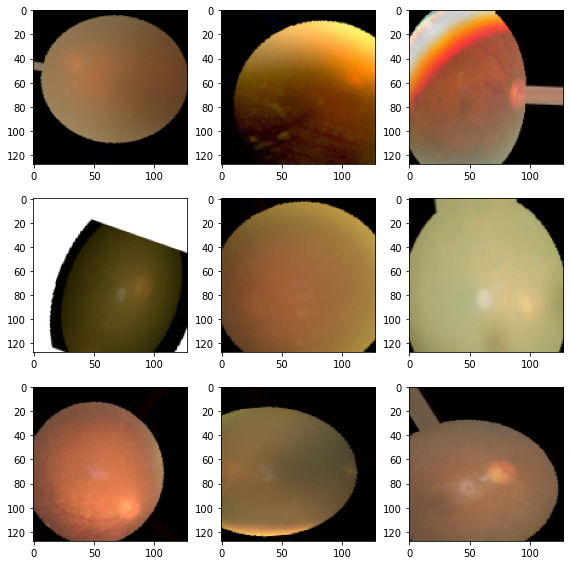

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    img = train_image_data[i]
    #image = cv2.imread(os.path.join(img_dir, img))
    #image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to rgb

    #index
    plt.subplot(3,3, i+1)
    plt.imshow(img)

    #view
    #plt.xlabel('File names : {}\n''Train'.format(train_image_data[i]))

plt.tight_layout()

# Modelling

In [ ]:
#!pip install keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
base_convnet = InceptionV3(input_shape = (128,128,3),
                           include_top = False,
                           weights = "imagenet",
                           classifier_activation='softmax',
                           pooling = max)

base_convnet.trainable = False
last_layer = base_convnet.get_layer("mixed7")
print('Last Layer output shape :', last_layer.output_shape)
last_output = last_layer.output

Last Layer output shape : (None, 6, 6, 768)


In [ ]:
effnet = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [ ]:
# effnet = EfficientNetB7(input_shape = (100,100,3),
#                            include_top = False,
#                            weights = "imagenet",
#                            classifier_activation='softmax',
#                            pooling = max)

# base_convnet.trainable = False
# last_layer = base_convnet.get_layer("mixed7")
# print('Last Layer output shape :', last_layer.output_shape)
# last_output = last_layer.output

In [ ]:
effnet = EfficientNetB7(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [ ]:
x = keras.layers.GlobalAveragePooling2D()(effnet.output)

x = keras.layers.Dense(128, activation='elu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Dense(256, activation='elu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)


#FCL
#x = keras.layers.Flatten()
x = keras.layers.Dense(512, activation='elu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)


# define and compile model
#inputs=effnet.input, outputs = model6
model = keras.Model(inputs=effnet.inputs, outputs=predictions)
for layer in base_convnet.layers:
    layer.trainable = False

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
"""Adamax = keras.optimizers.Adamax(learning_rate=1e-3, decay=1e-3/12)
model.compile(optimizer=Adamax,
              loss='binary_crossentropy',
              metrics=['accuracy'])
"""

In [ ]:
model.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["acc"])

In [ ]:
H = model.fit(train_generator, epochs=100,validation_data = validation_generator)

Epoch 1/100
29/29 [==============================] - 19s 470ms/step - loss: 1.0080 - acc: 0.5126 - val_loss: 4.0644 - val_acc: 0.5614
Epoch 2/100
29/29 [==============================] - 10s 349ms/step - loss: 0.9016 - acc: 0.5781 - val_loss: 2.2924 - val_acc: 0.6316
Epoch 3/100
29/29 [==============================] - 10s 346ms/step - loss: 0.6350 - acc: 0.7268 - val_loss: 0.8663 - val_acc: 0.5175
Epoch 4/100
29/29 [==============================] - 10s 353ms/step - loss: 0.4317 - acc: 0.8372 - val_loss: 0.4603 - val_acc: 0.7807
Epoch 5/100
29/29 [==============================] - 12s 401ms/step - loss: 0.4115 - acc: 0.8415 - val_loss: 1.6306 - val_acc: 0.4386
Epoch 6/100
29/29 [==============================] - 10s 348ms/step - loss: 0.3704 - acc: 0.8699 - val_loss: 0.5626 - val_acc: 0.7105
Epoch 7/100
29/29 [==============================] - 10s 350ms/step - loss: 0.3454 - acc: 0.8754 - val_loss: 0.4778 - val_acc: 0.7456
Epoch 8/100
29/29 [==============================] - 10s 347ms

# Evaluation

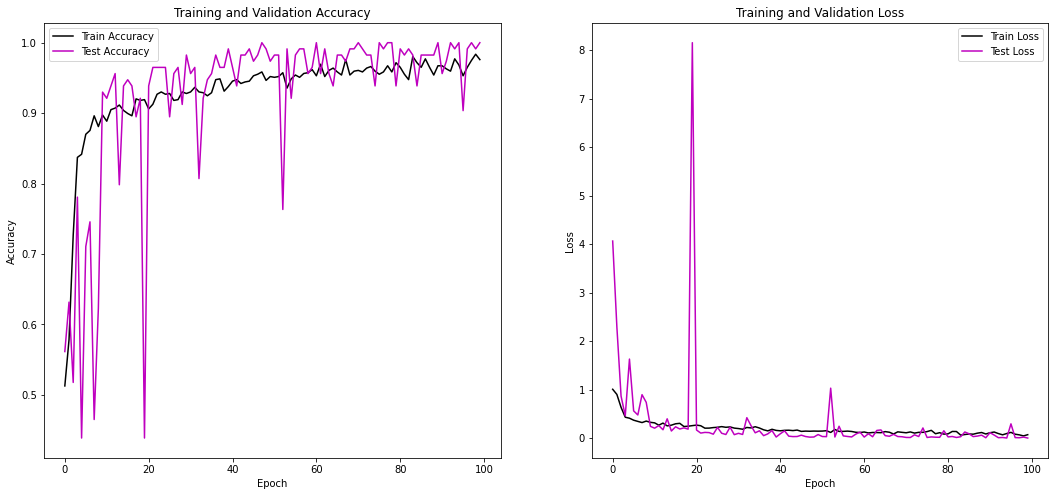

In [ ]:
#coba 2
acc = H.history['acc']
val_acc = H.history['val_acc']
epochs = len(acc)

loss = H.history['loss']
val_loss = H.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc,'k')
plt.plot(epochs_range,val_acc,'m')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'k')
plt.plot(epochs_range, val_loss, 'm')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train Loss','Test Loss'])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_generator.reset()

In [ ]:
pred = model.predict(test_generator,verbose=1,steps=test_generator.samples/batch_size)

3/3 [==============================] - 1s 194ms/step


In [ ]:
import numpy as np
predicted_class_idx=np.argmax(pred,axis=1)

## print the same 10 rows

print(predicted_class_idx[0:10])

[0 0 1 1 1 0 1 1 1 1]


In [ ]:
## let's get the first 10 rows
print(pred[0:10])

[[9.9999964e-01 3.5680807e-07]
 [9.9999952e-01 4.7718243e-07]
 [2.0570780e-05 9.9997938e-01]
 [9.4133234e-12 1.0000000e+00]
 [1.4454680e-07 9.9999988e-01]
 [9.9999964e-01 3.7291809e-07]
 [4.7827402e-08 1.0000000e+00]
 [4.2965695e-08 1.0000000e+00]
 [1.4412187e-13 1.0000000e+00]
 [2.7688028e-12 1.0000000e+00]]


In [ ]:
print(len(predicted_class_idx))

114


In [ ]:
model.evaluate(test_generator,use_multiprocessing=True,workers=10)

4/4 [==============================] - 2s 161ms/step - loss: 0.0024 - acc: 1.0000


[0.002394250826910138, 1.0]

In [ ]:
test_generator.class_indices.items()

dict_items([('cataract', 0), ('normal', 1)])

In [ ]:
valid_labels = dict((value,key) for key,value in test_generator.class_indices.items())
pred_labels = [valid_labels[key] for key in predicted_class_idx]

In [ ]:
pred_labels[1:10]

['cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal']

In [ ]:
filenames = test_generator.filenames
prediction_df = pd.DataFrame({'Filename': filenames,'Prediction': pred_labels})
prediction_df.head()

,Filename,Prediction
0,2151_left.jpg,cataract
1,2194_left.jpg,cataract
2,461_left.jpg,normal
3,2466_right.jpg,normal
4,3165_right.jpg,normal


In [ ]:
prediction_df.iloc[35]

Filename      61_right.jpg
Prediction          normal
Name: 35, dtype: object

In [ ]:
print(test_generator.filenames[35])
print(test_generator.labels[35])

61_right.jpg
1


In [ ]:
test_file_names=test_generator.filenames  # sequential list of name of test files of each sample
test_labels=test_generator.labels # is a sequential list  of test labels for each image sample
class_dict= test_generator.class_indices # a dictionary where key is the class name and value is the label for the class

print (class_dict) # have a look at the dictionary

new_dict={}

for key in class_dict: # set key in new_dict to value in class_dict and value in new_dict to key in class_dict
    value = class_dict[key]
    new_dict[value] = key

print('  RESULT  PREDICT      TRUE CLASS       FILENAME ' ) # adjust spacing based on your class names

for i, p in enumerate(pred):
    pred_index=np.argmax(p) # get the index that has the highest probability
    pred_class=new_dict[pred_index]  # find the predicted class based on the index
    true_class=new_dict[test_labels[i]] # use the test label to get the true class of the test file
    file=test_file_names[i]

    if true_class == pred_class:
        result = "Correct"
    else:
        result = "Wrong  "

    print(f' {result}   {pred_class}    {true_class}      {file}')

{'cataract': 0, 'normal': 1}
  RESULT  PREDICT      TRUE CLASS       FILENAME 
 Correct   cataract    cataract      2151_left.jpg
 Correct   cataract    cataract      2194_left.jpg
 Correct   normal    normal      461_left.jpg
 Correct   normal    normal      2466_right.jpg
 Correct   normal    normal      3165_right.jpg
 Correct   cataract    cataract      2153_right.jpg
 Correct   normal    normal      4114_right.jpg
 Correct   normal    normal      3150_right.jpg
 Correct   normal    normal      2653_right.jpg
 Correct   normal    normal      789_left.jpg
 Correct   normal    normal      3138_left.jpg
 Correct   normal    normal      1072_left.jpg
 Correct   cataract    cataract      2171_left.jpg
 Correct   normal    normal      3983_left.jpg
 Correct   normal    normal      3252_left.jpg
 Correct   normal    normal      4683_left.jpg
 Correct   normal    normal      2898_right.jpg
 Correct   cataract    cataract      2262_left.jpg
 Correct   normal    normal      3291_right.jpg
 C

In [ ]:
x_test, y_test = test_generator.next()

In [ ]:
print(len(x_test))
print(len(y_test))


## compare this length to our prediction data and notice the difference.

print(len(pred))

32
32
114


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

1/1 [==============================] - 0s 76ms/step - loss: 0.0016 - acc: 1.0000
loss: 0.001583955716341734
Accuracy: 1.0


In [ ]:
test_image_data, test_labels = test_generator.next()

In [ ]:
print(test_image_data.shape)
print(test_labels.shape)

(32, 128, 128, 3)
(32, 2)


In [ ]:
z = 0
#test filename

test_file_names=test_generator.filenames[z]
print(test_file_names)

test_labels_example=test_generator.labels[z]
print(test_labels_example)

pred_labels[z]

2151_left.jpg
0


'cataract'

In [ ]:
test_labels[5]

array([1., 0.], dtype=float32)

In [ ]:
test_class_idx=np.argmax(test_labels,axis=1)
#test_class_idx[4]
test_class_idx

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

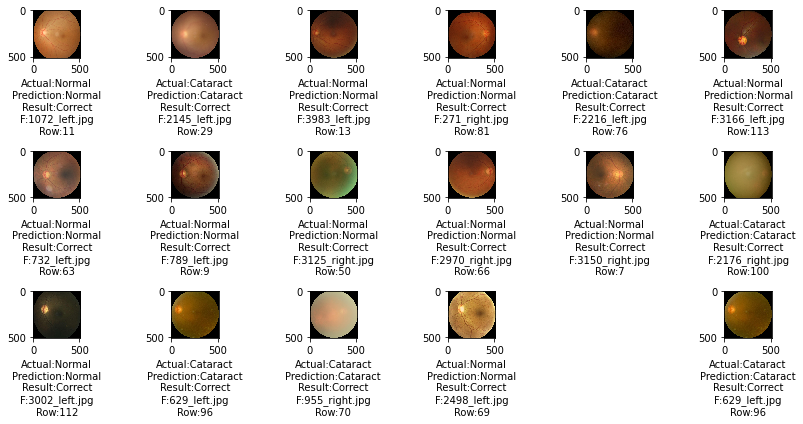

In [ ]:
import random
plt.figure(figsize=(12,6))
for i in range(18):
    sample = random.choice(range(test_generator.samples))
#    print(str(sample))
    img = test_generator.filenames[sample]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    category = test_generator.labels[sample]
    pred_category = pred_labels[sample]

#    sample = random.choice(range(0,test_generator.samples))
#    image = test_image_data[sample]
#    category = test_class_idx[sample]
#    pred_category = pred_labels[sample]

    if category== 1:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== "normal":
        pred_label = "Normal"
    else:
        pred_label = "Cataract"

    if label == pred_label:
        result = "Correct"
    else:
        result = "Wrong"

    plt.subplot(3,6,i+1)
    plt.imshow(image_rgb, interpolation='nearest')
    plt.xlabel("Actual:{}\nPrediction:{}\nResult:{}\nF:{}\nRow:{}".format(label,
                                                                          pred_label,
                                                                          result,
                                                                          test_generator.filenames[sample],
                                                                          sample))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['Cataract', 'Normal']
print(classification_report(test_generator.classes, predicted_class_idx, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    Cataract       1.00      1.00      1.00        50
      Normal       1.00      1.00      1.00        64

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.labels, predicted_class_idx)
print('Confusion Matrix')
cm

Confusion Matrix


array([[50,  0],
       [ 0, 64]])

In [ ]:
import numpy as np # linear algebra
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
cm_plot_labels = ['cataract','normal']

Confusion matrix, without normalization
[[50  0]
 [ 0 64]]


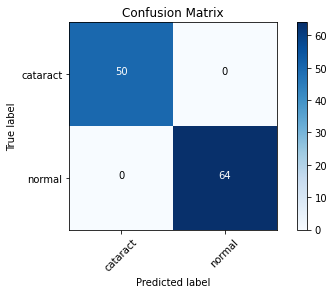

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

eval 2

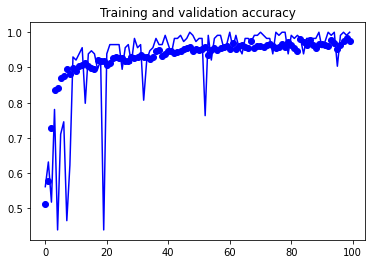

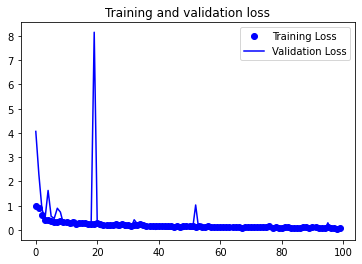

In [ ]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['cataract', 'normal']


In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

<ipython-input-113-9228fec5cc2c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Classification Report
              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00        50
      normal       1.00      1.00      1.00        64

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



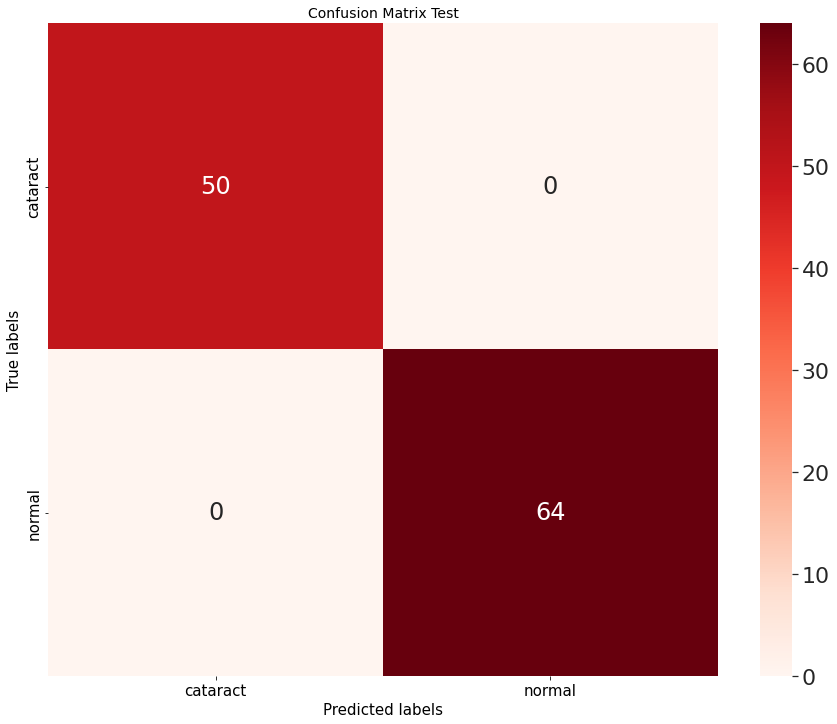

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font)

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()